In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = pd.read_excel('Histori_Banjir_BPBD.xlsx')

print(data.head())



   OBJECTID        WILAYAH   KECAMATAN         KELURAHAN  NO_RT  NO_RW  \
0     34345  JAKARTA TIMUR     MAKASAR   CIPINANG MELAYU      1      3   
1     34346  JAKARTA TIMUR     MAKASAR   CIPINANG MELAYU     11      2   
2     35774  JAKARTA BARAT  CENGKARENG  CENGKARENG BARAT      4     11   
3     35775  JAKARTA BARAT  CENGKARENG  CENGKARENG BARAT      2     10   
4     35776  JAKARTA BARAT  CENGKARENG  CENGKARENG BARAT      8     10   

   NO_KEL  NO_KEC  NO_KAB          ID_RT_AR  LUAS_AREA GENANGAN  TINGGI FLOOD  \
0    1005       8      75  3175081005003001   0.004461    40 cm       2   YES   
1    1005       8      75  3175081005002011   0.007258    40 cm       2   YES   
2    1001       1      73  3173011001011004   0.026886    40 cm       2   YES   
3    1001       1      73  3173011001010002   0.048910    40 cm       2   YES   
4    1001       1      73  3173011001010008   0.034261    40 cm       2   YES   

  KETERANGAN               WAKTU        WAKTU_TEXT    SHAPE.AREA    

In [4]:
data['FLOOD'] = data['FLOOD'].str.upper()
data['FLOOD'] = data['FLOOD'].fillna('NO')

In [5]:
data['date'] = pd.to_datetime(data['WAKTU'])


In [18]:
data['GENANGAN'] = pd.to_numeric(data['GENANGAN'], errors='coerce')
data['cumulative_rainfall'] = data['GENANGAN'].rolling(window=7).sum()

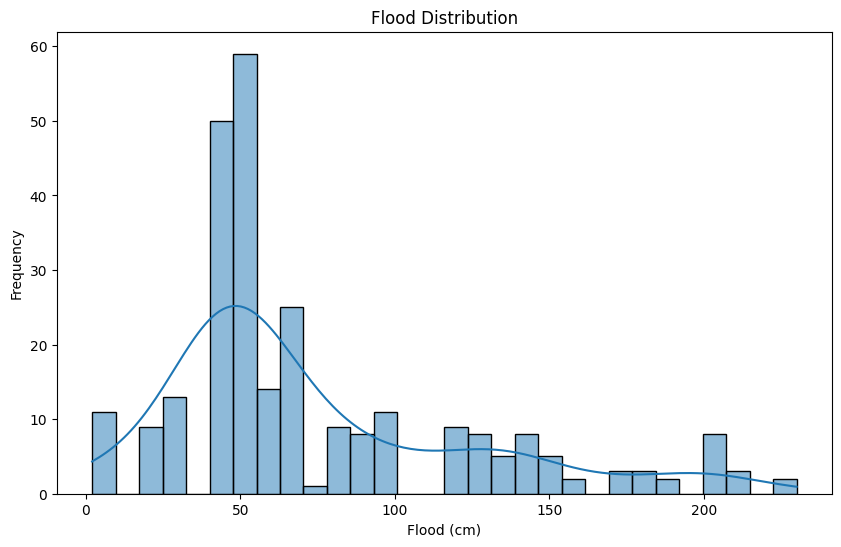

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['GENANGAN'], bins=30, kde=True)
plt.title('Flood Distribution')
plt.xlabel('Flood (cm)')
plt.ylabel('Frequency')
plt.show()

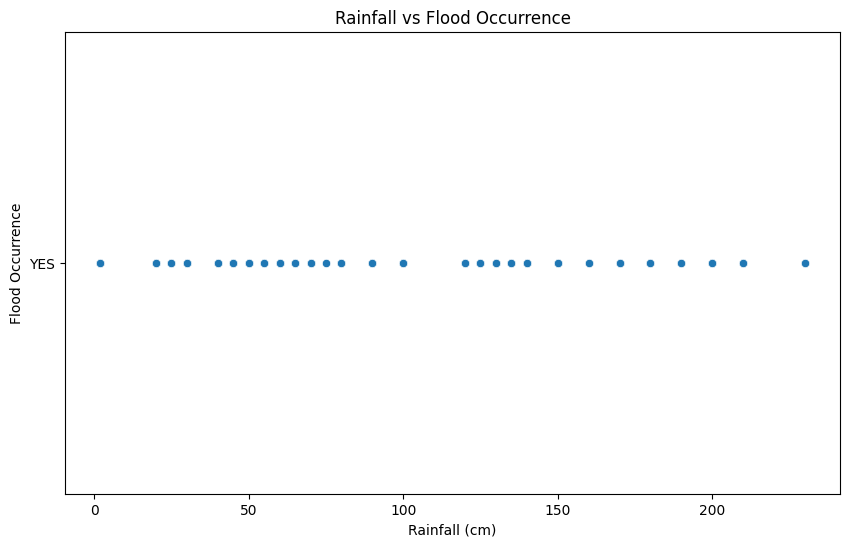

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GENANGAN', y='FLOOD', data=data)
plt.title('Rainfall vs Flood Occurrence')
plt.xlabel('Rainfall (cm)')
plt.ylabel('Flood Occurrence')
plt.show()

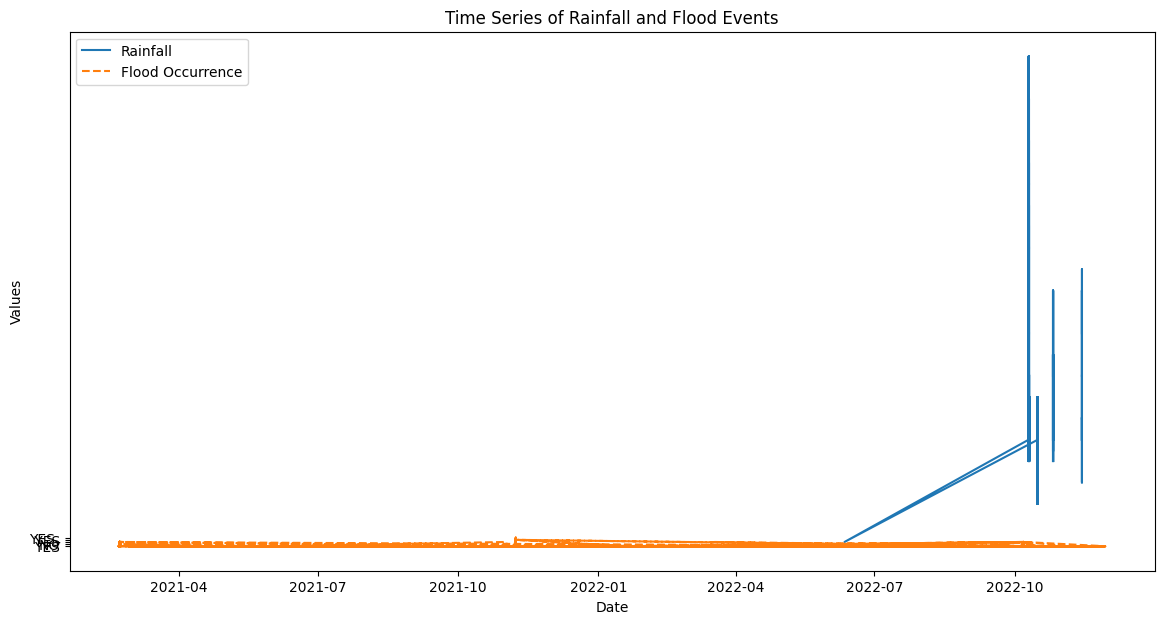

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data['WAKTU'], data['GENANGAN'], label='Rainfall')
plt.plot(data['WAKTU'], data['FLOOD'], label='Flood Occurrence', linestyle='--')
plt.title('Time Series of Rainfall and Flood Events')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()


In [10]:
X = data[['GENANGAN', 'cumulative_rainfall']]
y = data['FLOOD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
data.describe()

,OBJECTID,NO_RT,NO_RW,NO_KEL,NO_KEC,NO_KAB,ID_RT_AR,LUAS_AREA,GENANGAN,TINGGI,WAKTU,SHAPE.AREA,SHAPE.LEN,date,cumulative_rainfall
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5.999000e+03,5999.000000,268.000000,5999.000000,5999,5998.000000,5998.000000,5999,72.000000
mean,35316.704117,7.615103,5.495749,1005.142690,4.934989,74.195033,3.175379e+15,0.024434,74.000000,2.431072,2021-12-23 02:27:06.445074432,24445.256850,642.156878,2021-12-23 02:27:06.445074432,478.625000
min,30387.000000,1.000000,1.000000,1001.000000,1.000000,71.000000,3.171051e+15,0.000000,2.000000,0.000000,2021-02-20 12:00:19,756.263767,117.102247,2021-02-20 12:00:19,138.000000
25%,33699.500000,4.000000,3.000000,1002.000000,3.000000,74.000000,3.174031e+15,0.005178,40.000000,2.000000,2021-02-21 18:26:57,5179.597909,335.114031,2021-02-21 18:26:57,350.000000
50%,35361.000000,7.000000,5.000000,1003.000000,4.000000,74.000000,3.174091e+15,0.012361,50.000000,2.000000,2022-01-19 07:23:52,12362.967860,520.059208,2022-01-19 07:23:52,413.500000
75%,36860.500000,11.000000,7.000000,1005.000000,7.000000,75.000000,3.175041e+15,0.025422,100.000000,3.000000,2022-09-12 09:00:19,25429.785101,782.644348,2022-09-12 09:00:19,612.500000
max,38360.000000,999.000000,999.000000,9999.000000,99.000000,99.000000,1.000000e+16,0.743392,230.000000,4.000000,2022-11-29 12:00:19,743528.885057,6982.436134,2022-11-29 12:00:19,900.000000
std,1790.250393,13.567279,13.182584,116.160725,2.649613,0.923536,8.813176e+13,0.045346,50.130018,0.644215,NaN,45353.201349,498.278266,NaN,182.629729


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median'
X_imputed = imputer.fit_transform(X)

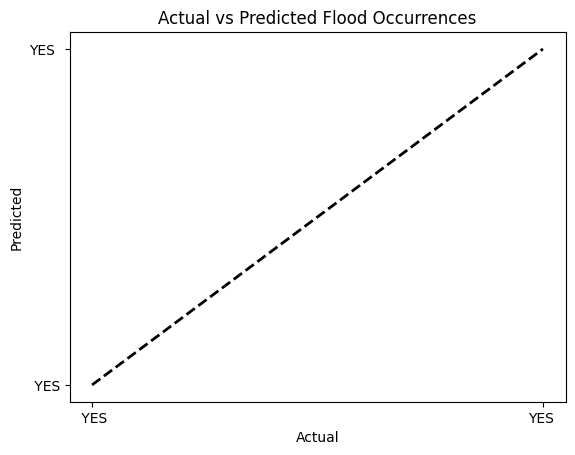

In [13]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
# Encode the target variable 'FLOOD'
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Flood Occurrences')
plt.show()
X = X.dropna()

In [14]:
flood_causes = data.groupby('KETERANGAN').size()
print(flood_causes)

KETERANGAN
-                                                1160
03:00 wib                                          21
23/02/21, 12:00                                     1
BANJIR                                              2
CURAH HUJAN TINGGI                                327
                                                 ... 
curah hujan tinggi dan luapan kali angke           18
curah hujan tinggi dan luapan sungai ciliwung      39
luapan kali angke                                   8
luapan kali krukut                                 93
rob                                                18
Length: 88, dtype: int64


In [16]:
data2 = pd.read_csv('data_finish.csv')

print(data.head())

   OBJECTID        WILAYAH   KECAMATAN         KELURAHAN  NO_RT  NO_RW  \
0     34345  JAKARTA TIMUR     MAKASAR   CIPINANG MELAYU      1      3   
1     34346  JAKARTA TIMUR     MAKASAR   CIPINANG MELAYU     11      2   
2     35774  JAKARTA BARAT  CENGKARENG  CENGKARENG BARAT      4     11   
3     35775  JAKARTA BARAT  CENGKARENG  CENGKARENG BARAT      2     10   
4     35776  JAKARTA BARAT  CENGKARENG  CENGKARENG BARAT      8     10   

   NO_KEL  NO_KEC  NO_KAB          ID_RT_AR  ...  GENANGAN  TINGGI  FLOOD  \
0    1005       8      75  3175081005003001  ...       NaN       2    YES   
1    1005       8      75  3175081005002011  ...       NaN       2    YES   
2    1001       1      73  3173011001011004  ...       NaN       2    YES   
3    1001       1      73  3173011001010002  ...       NaN       2    YES   
4    1001       1      73  3173011001010008  ...       NaN       2    YES   

  KETERANGAN               WAKTU        WAKTU_TEXT    SHAPE.AREA    SHAPE.LEN  \
0        Na